### Import Padrões

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import unidecode

#### Importadação da Planilha

In [2]:
df = pd.read_csv('BI-DadosVendas.csv', sep=";", encoding='utf8')

In [3]:
valinicial = len(df)

#### Verificação da quantidade de Linhas da Tabela

In [4]:
valinicial

1780

#### Remoção de registros com valores nulos

In [5]:
df.dropna(inplace=True)

In [6]:
len(df)

1779

#### Remoção de Caracters especiais e números nas variáveis categoricas

In [7]:
df['Tipo de Cliente'] = df['Tipo de Cliente'].replace('[0-9]', '', regex=True)
df['Região'] = df['Região'].replace('[0-9]', '', regex=True)
df['Região'] = df['Região'].replace('CuritibaCuritiba', 'Curitiba', regex=True)
df['Gênero'] = df['Gênero'].replace('2', 'Feminino', regex=True)
df['Região'] = df['Região'].apply(lambda x: unidecode.unidecode(x))

#### Verificação dos registros da Região 

In [9]:
df.groupby('Região', axis=0).count().index

Index(['Colombo', 'Curitiba', 'CuritibaColombo', 'CuritibaLondrina',
       'CuritibaMaringa', 'Dois Vizinhos', 'Foz do Iguacu',
       'Francisco Beltrao', 'Guarapuava', 'Londrina', 'Maringa', 'Pato Branco',
       'Toledo'],
      dtype='object', name='Região')

In [10]:
cidadesPermitidas = ['Colombo', 'Curitiba', 'Dois Vizinhos', 'Foz do Iguacu',
       'Francisco Beltrao', 'Guarapuava', 'Londrina', 'Maringa', 'Pato Branco',
       'Toledo']

In [11]:
len(df) - len(df[df['Região'].isin(cidadesPermitidas)])

8

In [12]:
df = df[df['Região'].isin(cidadesPermitidas)]
df = df[df['Estado Civil'] != '6']

In [13]:
pd.DataFrame(df.groupby(['Gênero', 'Estado Civil'], axis=0).count()['Cliente'])

Cliente
Gênero    Estado Civil         
Feminino  Casado(a)         942
          Solteiro(a)       651
Masculino Casado(a)         111
          Solteiro(a)        64

In [14]:
pd.DataFrame(df.groupby('Tipo de Cliente', axis=0).count()['Cliente'])

,Cliente
Tipo de Cliente,
Compra,472
Regular,740
Retorno,556


In [15]:
pd.DataFrame(df.groupby(['Estado Civil']).count()['Cliente'])

,Cliente
Estado Civil,
Casado(a),1053
Solteiro(a),715


In [16]:
pd.DataFrame(df.groupby(['Tipo de Cliente', 'Método de Pagamento']).sum()[['Itens', 'Vendas Líquidas ($)']])

Itens  Vendas Líquidas ($)
Tipo de Cliente Método de Pagamento                              
Compra          American Express        3.00                66.00
                Boleto               2240.11             29732.60
                Discover                4.00               112.50
                MasterCard            221.92              2648.60
                Visa                  336.85              4553.00
Regular         Boleto               3632.84             37038.35
                MasterCard            371.21              4165.81
                Visa                  549.71              5803.20
Retorno         American Express        7.00               266.00
                Boleto               2602.38             37074.58
                Discover                3.00               128.50
                MasterCard            197.82              3045.42
                Visa                  409.58              7773.92

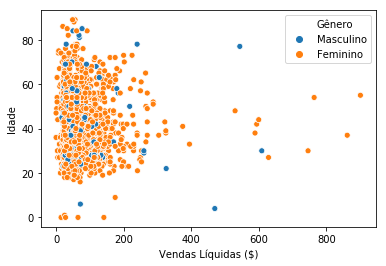

In [18]:
sns.scatterplot(x=df['Vendas Líquidas ($)'], y=df['Idade'], hue=df['Gênero'])

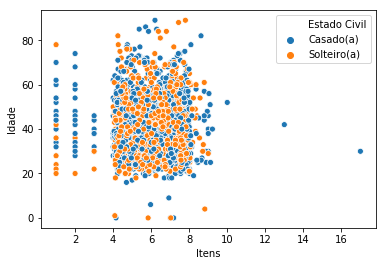

In [293]:
sns.scatterplot(x=df['Itens'], y=df['Idade'], hue=df['Estado Civil'])

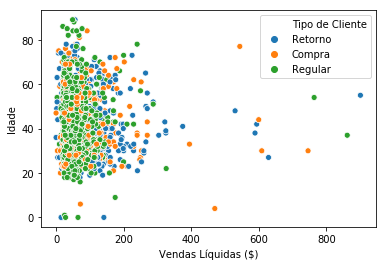

In [19]:
sns.scatterplot(x=df['Vendas Líquidas ($)'], y=df['Idade'], hue=df['Tipo de Cliente'])

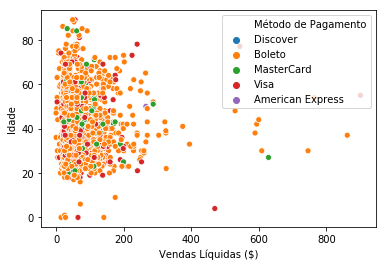

In [20]:
sns.scatterplot(x=df['Vendas Líquidas ($)'], y=df['Idade'], hue=df['Método de Pagamento'])

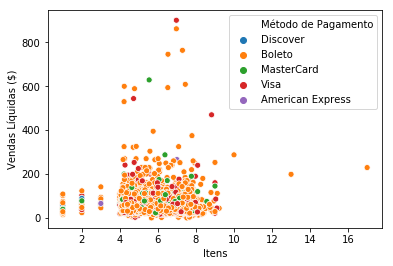

In [238]:
sns.scatterplot(x=df['Itens'], y=df['Vendas Líquidas ($)'], hue=df['Método de Pagamento'])

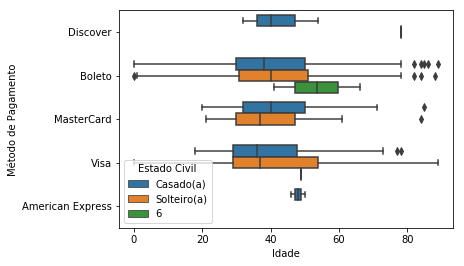

In [262]:
sns.boxplot(data=df, x='Idade', y='Método de Pagamento', hue='Estado Civil')

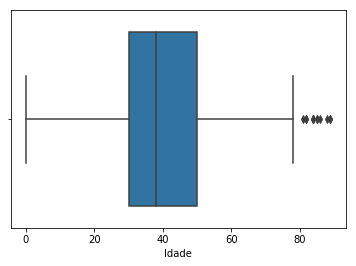

In [254]:
sns.boxplot(df['Idade'])

NameError: name 'plt' is not defined

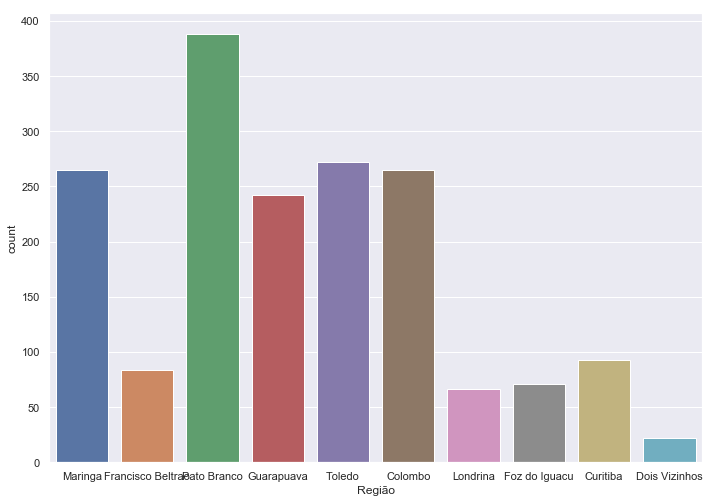

In [302]:
sns.countplot(x='Região', data=df)
plt.figure(figsize=(30,8))


In [521]:
print(pd.DataFrame(df.groupby(['Região', 'Gênero']).count()).to_csv(sep=';', decimal=',', float_format='%.3f'))

Região;Gênero;Cliente;Tipo de Cliente;Itens;Vendas Líquidas ($);Método de Pagamento;Estado Civil;Idade;Grupo VL;Grupo Idade;Grupo Itens
Colombo;Feminino;245;245;245;245;245;245;245;245;245;245
Colombo;Masculino;20;20;20;20;20;20;20;20;20;20
Curitiba;Feminino;84;84;84;84;84;84;84;84;84;84
Curitiba;Masculino;9;9;9;9;9;9;9;9;9;9
Dois Vizinhos;Feminino;22;22;22;22;22;22;22;22;22;22
Foz do Iguacu;Feminino;63;63;63;63;63;63;63;63;63;63
Foz do Iguacu;Masculino;8;8;8;8;8;8;8;8;8;8
Francisco Beltrao;Feminino;71;71;71;71;71;71;71;71;71;71
Francisco Beltrao;Masculino;13;13;13;13;13;13;13;13;13;13
Guarapuava;Feminino;218;218;218;218;218;218;218;218;218;218
Guarapuava;Masculino;24;24;24;24;24;24;24;24;24;24
Londrina;Feminino;60;60;60;60;60;60;60;60;60;60
Londrina;Masculino;6;6;6;6;6;6;6;6;6;6
Maringa;Feminino;235;235;235;235;235;235;235;235;235;235
Maringa;Masculino;30;30;30;30;30;30;30;30;30;30
Pato Branco;Feminino;350;350;350;350;350;350;350;350;350;350
Pato Branco;Masculino;38;38;38;38;38;38;38;

In [390]:
groupcity

Cliente  Tipo de Cliente  Itens  \
Região            Gênero                                       
Colombo           Feminino       245              245    245   
                  Masculino       20               20     20   
Curitiba          Feminino        84               84     84   
                  Masculino        9                9      9   
Dois Vizinhos     Feminino        22               22     22   
Foz do Iguacu     Feminino        63               63     63   
                  Masculino        8                8      8   
Francisco Beltrao Feminino        71               71     71   
                  Masculino       13               13     13   
Guarapuava        Feminino       218              218    218   
                  Masculino       24               24     24   
Londrina          Feminino        60               60     60   
                  Masculino        6                6      6   
Maringa           Feminino       235              235    235   
                  Masculino       30               30     30   
Pato Branco       Feminino       350              350    350   
                  Masculino       38               38     38   
Toledo            Feminino       245              245    245   
                  Masculino       27               27     27   

                             Vendas Líquidas ($)  Método de Pagamento  \
Região            Gênero                                                
Colombo           Feminino                   245                  245   
                  Masculino                   20                   20   
Curitiba          Feminino                    84                   84   
                  Masculino                    9                    9   
Dois Vizinhos     Feminino                    22                   22   
Foz do Iguacu     Feminino                    63                   63   
                  Masculino                    8                    8   
Francisco Beltrao Feminino                    71                   71   
                  Masculino                   13                   13   
Guarapuava        Feminino                   218                  218   
                  Masculino                   24                   24   
Londrina          Feminino                    60                   60   
                  Masculino                    6                    6   
Maringa           Feminino                   235                  235   
                  Masculino                   30                   30   
Pato Branco       Feminino                   350                  350   
                  Masculino                   38                   38   
Toledo            Feminino                   245                  245   
                  Masculino                   27                   27   

                             Estado Civil  Idade  
Região            Gênero                          
Colombo           Feminino            245    245  
                  Masculino            20     20  
Curitiba          Feminino             84     84  
                  Masculino             9      9  
Dois Vizinhos     Feminino             22     22  
Foz do Iguacu     Feminino             63     63  
                  Masculino             8      8  
Francisco Beltrao Feminino             71     71  
                  Masculino            13     13  
Guarapuava        Feminino            218    218  
                  Masculino            24     24  
Londrina          Feminino             60     60  
                  Masculino             6      6  
Maringa           Feminino            235    235  
                  Masculino            30     30  
Pato Branco       Feminino            350    350  
                  Masculino            38     38  
Toledo            Feminino            245    245  
                  Masculino            27     27

In [391]:
# print(groupcity.to_csv(sep=';', decimal=',', float_format='%.3f'))

In [364]:
df['Vendas Líquidas ($)'].describe()

count    1768.000000
mean       74.891674
std        68.552729
min         0.000000
25%        39.000000
50%        60.000000
75%        89.000000
max       901.000000
Name: Vendas Líquidas ($), dtype: float64

In [392]:
def discretizacao(x):
    if(x < 39):
        return 'Grupo 1'
    if(x > 901):
        return 'Grupo 4'
    if(x < 60):
        return 'Grupo 2'
    else:
        return 'Grupo 3'

In [393]:
df['Grupo VL'] = df['Vendas Líquidas ($)'].apply(discretizacao)

In [394]:
df['Idade'].describe()

count    1768.000000
mean       40.882919
std        13.777001
min         0.000000
25%        30.000000
50%        38.000000
75%        50.000000
max        89.000000
Name: Idade, dtype: float64

In [395]:
def discretizacaoidade(x):
    if(x < 30):
        return 'Grupo 1'
    if(x > 50):
        return 'Grupo 4'
    if(x < 38):
        return 'Grupo 2'
    else:
        return 'Grupo 3'

In [396]:
df['Grupo Idade'] = df['Idade'].apply(discretizacaoidade)

In [397]:
df['Itens'].describe()

count    1768.000000
mean        5.983835
std         1.503038
min         1.000000
25%         4.960000
50%         6.050000
75%         7.132500
max        17.000000
Name: Itens, dtype: float64

In [398]:
def discretizacaoitem(x):
    if(x < 5):
        return 'Grupo 1'
    if(x > 7):
        return 'Grupo 4'
    if(x < 6):
        return 'Grupo 2'
    else:
        return 'Grupo 3'

In [399]:
df['Grupo Itens'] = df['Itens'].apply(discretizacaoitem)

In [433]:
from apy

SyntaxError: invalid syntax (<ipython-input-433-6ebfaef44526>, line 1)

In [404]:
apyori.

Index(['Cliente', 'Tipo de Cliente', 'Itens', 'Vendas Líquidas ($)',
       'Método de Pagamento', 'Gênero', 'Estado Civil', 'Idade', 'Região',
       'Grupo VL', 'Grupo Idade', 'Grupo Itens'],
      dtype='object')

In [430]:
aprioriResult = list(apriori(df[['Tipo de Cliente',
       'Método de Pagamento']]))

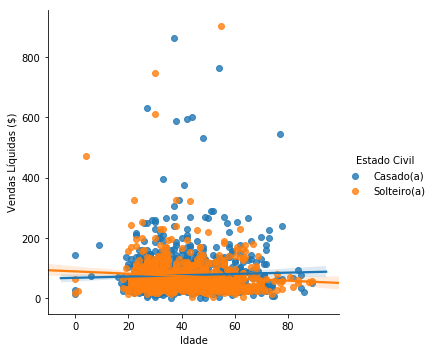

In [22]:
sns.lmplot(x='Idade', y='Vendas Líquidas ($)', hue='Estado Civil', data=df)

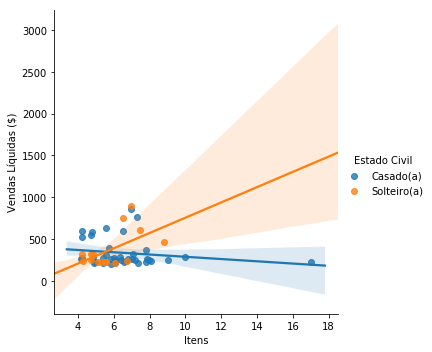

In [30]:
sns.lmplot(x='Itens', y='Vendas Líquidas ($)', hue='Estado Civil', data=df[df['Vendas Líquidas ($)'] > 200])

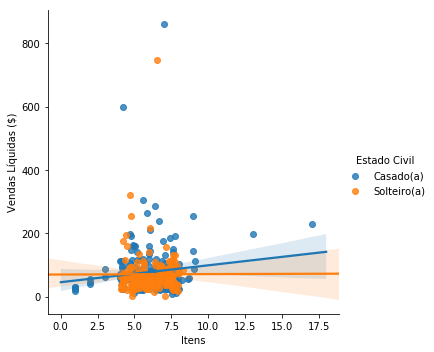

In [36]:
sns.lmplot(x='Itens', y='Vendas Líquidas ($)', hue='Estado Civil', data=df[df['Região'] == 'Pato Branco'])

In [27]:
df[df['Vendas Líquidas ($)'] > 400]

,Cliente,Tipo de Cliente,Itens,Vendas Líquidas ($),Método de Pagamento,Gênero,Estado Civil,Idade,Região
476,477,Compra,8.82,470.0,Visa,Masculino,Solteiro(a),4,Guarapuava
488,489,Retorno,4.22,530.0,Boleto,Feminino,Casado(a),48,Foz do Iguacu
919,920,Compra,4.72,544.0,Visa,Masculino,Casado(a),77,Guarapuava
920,921,Retorno,6.97,901.0,Visa,Feminino,Solteiro(a),55,Toledo
922,923,Regular,6.97,862.0,Boleto,Feminino,Casado(a),37,Pato Branco
925,926,Retorno,6.52,594.0,Boleto,Feminino,Casado(a),42,Londrina
927,928,Retorno,4.77,589.0,Boleto,Feminino,Casado(a),38,Guarapuava
971,972,Compra,7.44,609.0,Boleto,Masculino,Solteiro(a),30,Toledo
972,973,Compra,4.23,600.0,Boleto,Feminino,Casado(a),44,Pato Branco
973,974,Regular,7.29,764.0,Boleto,Feminino,Casado(a),54,Maringa


In [477]:
regiaodf = pd.DataFrame(df.groupby(['Região']).sum()[['Itens', 'Vendas Líquidas ($)']])

In [483]:
regiaocount = pd.DataFrame(df.groupby(['Região', 'Estado Civil']).count()['Cliente'])

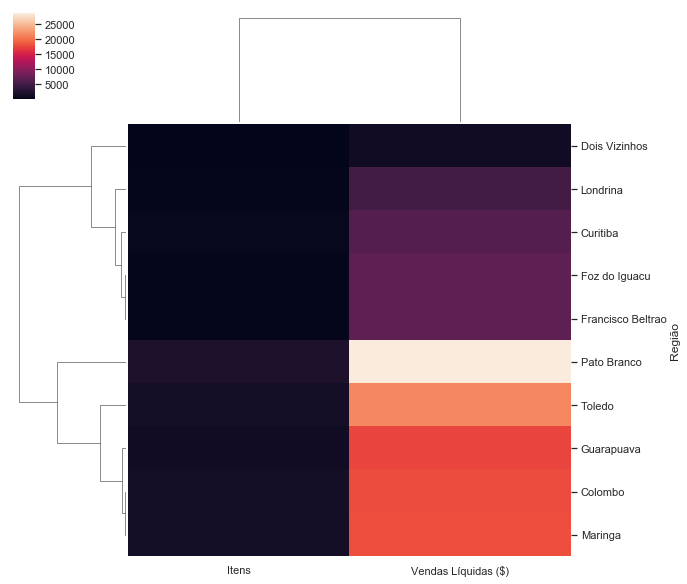

In [502]:
sns.clustermap(data=regiaodf)

In [ ]:
sns.